### Creating DataFrame

In [15]:
import pandas as pd

#Define file path add relative filepath to our data
path = r'../data/2018Dec.csv'

data = pd.read_csv(path)
data.head()

,Unnamed: 0,StationID,StationName,Lat,Lon
0,0,72.0,W 52 St & 11 Ave,40.767272,-73.993929
1,1,79.0,Franklin St & W Broadway,40.719116,-74.006667
2,2,82.0,St James Pl & Pearl St,40.711174,-74.000165
3,3,119.0,Park Ave & St Edwards St,40.696089,-73.978034
4,4,120.0,Lexington Ave & Classon Ave,40.686768,-73.959282


In [ ]:
# Import necessary package pandas
import pandas as pd

# Define filepath either relative or absolute path to file

path = r'D:\WorkSpace\Bike Mapping\201812-citibike-tripdata\201812-citibike-tripdata.csv'

# Open csv file
data = pd.read_csv(path)

# Check our data columns
print(data.columns)

# Group data by columns we are interested in our case station where ride started
group1 = data.groupby(['start station id',
       'start station name', 'start station latitude',
       'start station longitude'])

# Check our length of group
print(len(group1))

# Create a list to store our group keys
key = [key for key, _ in group1]

# Create a dataframe from the list
df = pd.DataFrame(key)

# Check our new dataframe first 5 rows
print(df.head)

# Rename our columns
df.rename(columns={0: 'StationID', 1: 'StationName', 2: 'Lat', 3: 'Lon'}, inplace=True)

# Saving the dataframe to csv file
#outpath = r'D:\WorkSpace\Bike Mapping\201812-citibike-tripdata\2018Dec.csv'
#df.to_csv(outpath)

### Converting DataFrame to GeoDataFrame

In [24]:
# Import necessary package geopandas
import geopandas as gpd

#Read in our cleaned data
#Define file path add relative filepath to our data
path = r'../data/2018Dec.csv'

data = pd.read_csv(path, )
data.head()

#Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.Lon, data.Lat))
gdf.head()

,Unnamed: 0,StationID,StationName,Lat,Lon,geometry
0,0,72.0,W 52 St & 11 Ave,40.767272,-73.993929,POINT (-73.99393 40.76727)
1,1,79.0,Franklin St & W Broadway,40.719116,-74.006667,POINT (-74.00667 40.71912)
2,2,82.0,St James Pl & Pearl St,40.711174,-74.000165,POINT (-74.00017 40.71117)
3,3,119.0,Park Ave & St Edwards St,40.696089,-73.978034,POINT (-73.97803 40.69609)
4,4,120.0,Lexington Ave & Classon Ave,40.686768,-73.959282,POINT (-73.95928 40.68677)


In [35]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

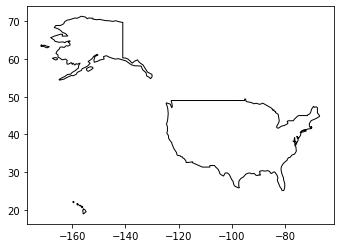

In [42]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.name == 'United States of America'].plot(
    color='white', edgecolor='black')
ax